In [26]:
import pandas as pd

# Read in the data
folder_path = 'C:\\Users\\aoife\Documents\\Project\\filtered_data\\'

save_path = 'C:\\Users\\aoife\Documents\\Project\\'

# Read in normalisaed data

df = pd.read_csv(folder_path + 'minmax_normalised_data.csv')


print(df.head(5))

                          participantId  bodyMass_kg  height_m       bmi  \
0  00a55fb5-da33-4e2e-ae61-28f589fcc174     0.080718  0.578971  0.101313   
1  00fd4039-9b5e-4bbb-8295-4983a3f58371     0.094290  0.606985  0.107675   
2  02d5125e-684f-4166-a3b7-5df1bcfc1661     0.094290  0.625662  0.101342   
3  080292d4-a0b0-4dd7-a7dd-191c8ac71664     0.121435  0.663015  0.116226   
4  080bacc1-4661-4735-acca-7d27ad1a4192     0.142863  0.663015  0.136735   

   mean_hr/s  hr_duration_(s)   max_hr   min_hr  totalSteps  \
0   0.359606         0.000544  0.44575  0.25425    0.018714   
1   0.322549         0.000475  0.37925  0.28750    0.000256   
2   0.276816         0.000741  0.44575  0.15425    0.045336   
3   0.264010         0.002037  0.49175  0.21250    0.016046   
4   0.294799         0.000833  0.47075  0.22500    0.053504   

   stepsTotalDuration  ...  wake_up_choices  wake_ups  weekly_naps  \
0            0.073681  ...         0.444444  0.000000          0.0   
1            0.016678  .

In [27]:
import numpy as np
from sklearn.model_selection import GridSearchCV, GroupKFold
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, make_scorer


In [28]:
# X - features

# X = df[['bodyMass_kg','height_m','bmi','mean_hr/s','hr_duration_(s)','max_hr','min_hr','totalSteps','steps_per_hour','totalDistance','dist_per_hour', 'alcohol_consumption', 'basic_expenses', 'caffeine', 'daily_activities', 'daily_smoking', 'education', 'flexible_work_hours', 'gender', 'good_life', 'hispanic','income', 'marital', 'race', 'smoking_status', 'menopause', 'recent_births', 'current_pregnant', 'work_schedule', 'alarm_dependency', 'driving_sleepy', 'falling_asleep', 'morning_person', 'nap_duration', 'sleep_lost', 'sleep_needed', 'sleep_partner', 'sleep_time_workday', 'sleep_time_weekend', 'wake_up_choices', 'wake_ups', 'weekly_naps', 'noise_light', 'stress_thinking', 'other_person', 'pain_discomfort', 'nightmares', 'bathroom_urges', 'other_reasons']].values

X = df[['bodyMass_kg','height_m','bmi','mean_hr/s','hr_duration_(s)','max_hr','min_hr','totalSteps','steps_per_hour','totalDistance','dist_per_hour']].values


# y - target
y = df['ssq_score'].values

groups = df['participantId'].values

In [29]:
# RMSE Scorer
def rmse_score(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse_score, greater_is_better=False)


In [30]:
gkf = GroupKFold(n_splits=10)


In [31]:
param_grid = {
    'activation': ['relu'],
    'batch_size': [100],
    'hidden_layer_sizes': [(50, 70)],
    'learning_rate': ['adaptive'],
    'learning_rate_init': [0.05],
    'max_iter': [500],
    'solver': ['sgd']
}

'''param_grid = {
    'hidden_layer_sizes': [(50,), (50,70), (100,)],
    'activation': ['relu'],
    'solver': ['sgd', 'adam'],
    'learning_rate_init': [0.0001, 0.01, 0.05],
    'batch_size': [50, 100],
    'learning_rate': ['invscaling', 'adaptive'],
    'max_iter': [500, 1000, 1500]
}'''

# 'tol': [1e-4, 1e-6]
# 'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1],

"param_grid = {\n    'hidden_layer_sizes': [(50,), (50,70), (100,)],\n    'activation': ['relu'],\n    'solver': ['sgd', 'adam'],\n    'learning_rate_init': [0.0001, 0.01, 0.05],\n    'batch_size': [50, 100],\n    'learning_rate': ['invscaling', 'adaptive'],\n    'max_iter': [500, 1000, 1500]\n}"

In [32]:
mlp_gs = GridSearchCV(MLPRegressor(max_iter=1000, random_state=42), param_grid, scoring=rmse_scorer, cv=gkf, verbose=2)

# Fit GridSearchCV
mlp_gs.fit(X, y, groups=groups) 


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[CV] END activation=relu, batch_size=100, hidden_layer_sizes=(50, 70), learning_rate=adaptive, learning_rate_init=0.05, max_iter=500, solver=sgd; total time=   0.5s
[CV] END activation=relu, batch_size=100, hidden_layer_sizes=(50, 70), learning_rate=adaptive, learning_rate_init=0.05, max_iter=500, solver=sgd; total time=   0.6s
[CV] END activation=relu, batch_size=100, hidden_layer_sizes=(50, 70), learning_rate=adaptive, learning_rate_init=0.05, max_iter=500, solver=sgd; total time=   1.0s
[CV] END activation=relu, batch_size=100, hidden_layer_sizes=(50, 70), learning_rate=adaptive, learning_rate_init=0.05, max_iter=500, solver=sgd; total time=   0.7s
[CV] END activation=relu, batch_size=100, hidden_layer_sizes=(50, 70), learning_rate=adaptive, learning_rate_init=0.05, max_iter=500, solver=sgd; total time=   0.6s
[CV] END activation=relu, batch_size=100, hidden_layer_sizes=(50, 70), learning_rate=adaptive, learning_rate_init=0.05, max_iter=500, solver=sgd; total time=   0.7s
[CV] END a

GridSearchCV(cv=GroupKFold(n_splits=10),
             estimator=MLPRegressor(max_iter=1000, random_state=42),
             param_grid={'activation': ['relu'], 'batch_size': [100],
                         'hidden_layer_sizes': [(50, 70)],
                         'learning_rate': ['adaptive'],
                         'learning_rate_init': [0.05], 'max_iter': [500],
                         'solver': ['sgd']},
             scoring=make_scorer(rmse_score, greater_is_better=False),
             verbose=2)

In [33]:
# Best hyperparameters
print("Best Parameters:", mlp_gs.best_params_)

# Best RMSE score
print("Best RMSE Score:", -mlp_gs.best_score_)

# Best model
best_model = mlp_gs.best_estimator_


Best Parameters: {'activation': 'relu', 'batch_size': 100, 'hidden_layer_sizes': (50, 70), 'learning_rate': 'adaptive', 'learning_rate_init': 0.05, 'max_iter': 500, 'solver': 'sgd'}
Best RMSE Score: 0.2710821015416289


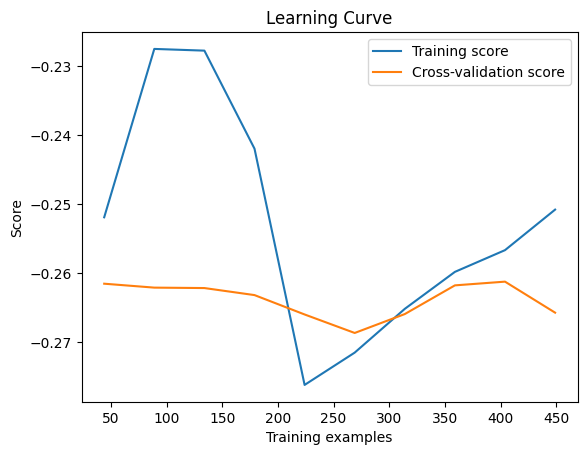

In [34]:
# plot learning curve

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(best_model, X, y, groups=groups, cv=gkf, scoring=rmse_scorer, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")

#plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
#plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, '-', label="Training score")
plt.plot(train_sizes, test_scores_mean, '-', label="Cross-validation score")

plt.legend(loc="best")
plt.show()



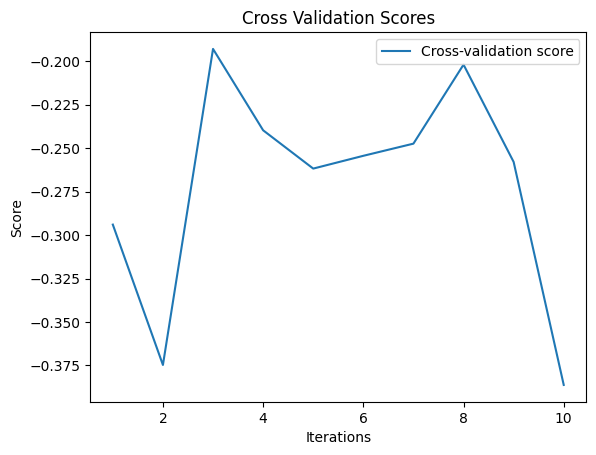

In [35]:
# plot scores

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_model, X, y, groups=groups, cv=gkf, scoring=rmse_scorer)

plt.figure()
plt.title("Cross Validation Scores")
plt.xlabel("Iterations")
plt.ylabel("Score")
plt.plot(range(1, len(scores) + 1), scores, '-', label="Cross-validation score")
plt.legend(loc="best")
plt.show()
